# **ATIVIDADE 1**


#**Funções**

In [ ]:
#Arquivo com os as funções solicitadas

import numpy as np
import math 
import matplotlib.pyplot as plt
import random

#classe para as funções
class funcoes():
    def __init__(self):
        pass

    def RSS(self, y_predict, y_true):
        RSS = np.sum((y_true - y_predict)**2)
        return RSS

    def R2(self, y_predict, y_true):
        TSS = np.sum((y_true - np.mean(y_true))**2)
        R2 = 1 - self.RSS(y_predict, y_true)/TSS
        return R2
      
    def MSE(self, y_predict, y_true):
        return np.mean((y_true - y_predict) ** 2)


# **Regressões**

---






In [ ]:
#implementação dos métodos solicitados

class RLA():
  #Regressão Linear univariada-método analítico

    def __init__(self):
        pass

    def fit(self, x, y):

        #tirando a media x = amostra, y = rotolos (ou observacao)
        x_media = np.mean(x)
        y_media = np.mean(y)

        #calculando o valor de beta1
        self.beta1 = np.sum((x - x_media)*(y - y_media)) / np.sum((x - x_media)**2)
        #Calculo do Beta0
        self.beta0 = y_media - self.beta1*x_media

    def predict(self,x):

        # Y e o valor predito calculado
        self.Y = self.beta0 + self.beta1*x
        return self.Y 

class RLGD():
      #Regressão Linear univariada-gradiente descendente
         
    def __init__(self, learning_rate=0.0001 , epocas = 1500):
      #Define uma reta mais próxima da reta real.
      #inicializando os pontos de forma aleatória
      #O learning_rate é a taxa de aprendizado, o quanto ele vai atualizar os valores de w(beta).
      #As épocas é quantas vezes ele vai atualizar os pesos(valores de w).
     
        self.learning_rate = learning_rate
        self.beta0 = random.random()
        self.beta1 = random.random()
        self.epocas = epocas

    def calculo_gradiente_decrescente(self, x, y):

        y_predicted = self.predict(x)
        erro = y - y_predicted 

        self.beta0 = self.beta0 + (self.learning_rate * np.mean(erro))
        self.beta1 = self.beta1 + (self.learning_rate * np.mean(erro * x))

    def fit(self, x, y):
        #treinando a RLGD
        #List serve para converter uma variável para lista.

        for _ in list(range(self.epocas)):
            self.calculo_gradiente_decrescente(x, y)

    def predict(self, x):
        #predição do RLGD

        beta = self.beta0 + (self.beta1*x)
        return beta

class MLR():
    #Regressão Linear Multivariada

    def __init__(self):
        pass

    def fit(self, x, y):
        #treinando a MLR
        #np.ones cria um vetor de 1's
        #np.hstack concatena as matrizes

        v_ones = np.ones((x.shape[0],1))
        x = np.hstack((v_ones,x))

        valor_aux = np.linalg.inv(np.matmul(x.T,x))
        self.beta = np.matmul(np.matmul(valor_aux,x.T),y)

    def predict(self, x):
        y_predict = np.array([])

        #Laço para equação de calculo da MLR b0 + b1*x1 ... bn*xn
        for i in x:
            y_predict = np.append(y_predict, self.beta[0] + np.matmul(i, self.beta[1:].T))

        return y_predict

class MLRGD():
    #Regressão Linear Multivariada com gradiente decrescente

    def __init__(self, learning_rate=0.0001, epoca=1500):
      #mse_grafic serve para armazenar os valores utilizados para plotar graficos

        self.learning_rate = learning_rate
        self.epoca = epoca
        self.beta = np.array([])
        self.mse_grafic = np.array([])

    def calculo_gradiente_descendente(self,x, y):

        y_predicted = self.predict(x[:,1:])
        erro = y - y_predicted

        features_size = x.shape[1]

        for i in range(features_size):
            self.beta[i] +=  (self.learning_rate * np.mean(erro * x[:, i]))
        
        mse_grafic = np.mean((y - self.predict(x[:,1:])) ** 2)
        self.mse_grafic = np.append(self.mse_grafic, mse_grafic)

    def fit(self, x, y):

        ones = np.ones((x.shape[0],1))
        x = np.hstack((ones,x))

        for _ in range(x.shape[1]):
            self.beta = np.append(self.beta, random.random())

        for _ in range(self.epoca):
            self.calculo_gradiente_descendente(x, y)

    def predict(self, x):
        
        y_predict = np.array([])

        #Laço para equação de calculo da MLR b0 + b1*x1 ... bn*xn
        for i in x:

          y_predict = np.append(y_predict, self.beta[0] + (i @ self.beta[1:].T))
        
        return y_predict

class MLRGDE():
    #Regressão Linear Multivariada com gradiente decrescente estocástico
    # @ = np.matmul(multiplicação de matriz)
    
    def __init__(self, learning_rate=0.0001, epoca=1000):
      
        self.learning_rate = learning_rate
        self.epoca = epoca
        self.beta = np.array([])
        self.mse_grafic = np.array([])

    def calculo_gradiente_descendente_estocastico(self,x, y):

        y_predicted = self.predict(x[:,1:])
        erro = y - y_predicted

        features_size = x.shape[1]
        
        for i in range(features_size):
            self.beta[i] +=  (self.learning_rate * (erro @ x[:, i]))
       
        mse_grafic = np.mean((y - self.predict(x[:,1:])) ** 2)
        self.mse_grafic = np.append(self.mse_grafic, mse_grafic)           

    def fit(self, x, y):

        ones = np.ones((x.shape[0],1))
        x = np.hstack((ones,x))

        for _ in range(x.shape[1]):
            self.beta = np.append(self.beta, random.random())

        for _ in range(self.epoca):
            self.calculo_gradiente_descendente_estocastico(x, y)

    def predict(self, x):
        
        y_predict = np.array([])

        #Laço para equação de calculo da MLR b0 + b1*x1 ... bn*xn
        for i in x:

          y_predict = np.append(y_predict, self.beta[0] + (i @ self.beta[1:].T))
        
        return y_predict

class RQ():
    #Regressão quadrática usando regressão múltipla

    def __init__(self):
        pass

    def fit(self, x, y):
        #treinando a MLR
        #np.hstack concatena as matrizes

        double_x = x*x
        x = np.hstack((x, double_x))

        self.model = MLR()
        self.model.fit(x,y)
        self.beta = self.model.beta

    def predict(self, x):

        double_x = x*x
        x = np.hstack((x, double_x))

        predict = self.model.predict(x)

        return predict

class RC():
      #Regressão cúbica usando regressão múltipla

    def __init__(self):
        pass

    def fit(self, x, y):
        #treinando a MLR
        #np.ones cria um vetor de 1's
        #np.hstack concatena as matrizes

        double_x = x*x
        triple_x = x*double_x
        x = np.hstack((x, double_x))
        x = np.hstack((x, triple_x))

        self.model = MLR()
        self.model.fit(x,y)
        self.beta = self.model.beta

    def predict(self, x):

        double_x = x*x
        triple_x = x*double_x
        x = np.hstack((x, double_x))
        x = np.hstack((x, triple_x)) 

        predict = self.model.predict(x)

        return predict

class RLMGD():

    def __init__(self, learning_rate=0.0001, epoca=1500, lambida = 1):

        self.learning_rate = learning_rate
        self.epoca = epoca
        self.beta = np.array([])
        self.lambida = lambida
        self.mse_grafic = np.array([])

    def calculo_regressao_linear_multivariada(self, x, y):
        #freatures_size = numero de coulunas
        y_predicted = self.predict(x)
        erro = y - y_predicted
        features_size = x.shape[1]
        n = features_size
        
        self.beta0 = self.beta0 + (self.learning_rate * np.mean(erro))

        for i in range(features_size):
            self.beta[i] += (self.learning_rate * np.mean(erro * x[:, i]) - (self.lambida/n * self.beta[i]))
        
        mse_grafic = np.mean((y - self.predict(x)) ** 2)
        self.mse_grafic = np.append(self.mse_grafic, mse_grafic)    

    def fit(self, x, y):

        self.beta0 = random.random()
    
        for _ in range(x.shape[1]):
            self.beta = np.append(self.beta, random.random())

        for _ in range(self.epoca):
            self.calculo_regressao_linear_multivariada(x, y)
    
    def predict(self, x):

        y_predict = np.array([])

          #Laço para equação de calculo de MLR b0 + b1*x1 ... + bn*xn
        for i in x:
            y_predict = np.append(y_predict, self.beta0 + np.matmul(i, self.beta.T))

        return y_predict


# **TESTES**

---



In [ ]:
data = np.loadtxt("Dados/housing.data", delimiter=",")
x = data[:, 12]
y = data[:, 13]

#para multivariada
x_aux = data[:,1:2]

#emabaralha os dados
np.random.shuffle(data) 

percentual = int(x.shape[0]*0.8) # 80% dos valores de amostra de x
x_train	= x[:percentual] #pegando 80% dos valores de amostra de x (FIT)
y_train	= y[:percentual] #pegando 80% dos valores de amostra de y (FIT)
x_teste = x[percentual:] #pegando 20% dos valores de amostra de x (PREDICT)
y_teste = y[percentual:] #pegando 20% dos valores de amostra de y (PREDICT)

x_train_aux	= x_aux[:percentual] #pegando 80% dos valores de amostra de x (FIT)
x_teste_aux = x_aux[percentual:] #pegando 20% dos valores de amostra de x (PREDICT)





# Questão 6)

In [ ]:
f_RLA = RLA()
f_RLGD = RLGD()
f_RQ = RQ()
f_RC = RC()
funcao = funcoes()

f_RLA.fit(x_train, y_train)
y_train_predict = f_RLA.predict(x_train)
y_test_predict = f_RLA.predict(x_teste)

print("Coeficientes: b0= e b1= ", (f_RLA.beta0, f_RLA.beta1))
print("###########---Treino---###########")
print("R2: ", funcao.R2(y_train_predict,y_train ))
print("MSE: ", funcao.MSE(y_train_predict, y_train))
print("###########---Teste---###########")
print("R2: ", funcao.R2(y_test_predict, y_teste))
print("MSE: ", funcao.MSE(y_test_predict, y_teste))

f_RLGD.fit(x_train, y_train)
y_train_predict = f_RLGD.predict(x_train)
y_test_predict = f_RLGD.predict(x_teste)

print("Coeficientes: b0= e b1= ", (f_RLGD.beta0, f_RLGD.beta1))
print("###########---Treino---###########")
print("R2: ", funcao.R2(y_train_predict,y_train ))
print("MSE: ", funcao.MSE(y_train_predict, y_train))
print("###########---Teste---###########")
print("R2: ", funcao.R2(y_test_predict, y_teste))
print("MSE: ", funcao.MSE(y_test_predict, y_teste))

f_RQ.fit(x_train_aux, y_train)
y_train_predict = f_RQ.predict(x_train_aux)
y_test_predict = f_RQ.predict(x_teste_aux)

print("Coeficiente: ", (f_RQ.beta))
print("###########---Treino---###########")
print("R2: ", funcao.R2(y_train_predict,y_train ))
print("MSE: ", funcao.MSE(y_train_predict, y_train))
print("###########---Teste---###########")
print("R2: ", funcao.R2(y_test_predict, y_teste))
print("MSE: ", funcao.MSE(y_test_predict, y_teste))

f_RC.fit(x_train_aux, y_train)
y_train_predict = f_RC.predict(x_train_aux)
y_test_predict = f_RC.predict(x_teste_aux)

print("Coeficiente: ", (f_RC.beta))
print("###########---Treino---###########")
print("R2: ", funcao.R2(y_train_predict,y_train ))
print("MSE: ", funcao.MSE(y_train_predict, y_train))
print("###########---Teste---###########")
print("R2: ", funcao.R2(y_test_predict, y_teste))
print("MSE: ", funcao.MSE(y_test_predict, y_teste))



Coeficientes: b0= e b1=  (34.77061475329917, -0.9614460201343051)
###########---Treino---###########
R2:  0.5395360364561518
MSE:  39.19074019721822
###########---Teste---###########
R2:  0.545574272520289
MSE:  35.73854981942503
Coeficientes: b0= e b1=  (2.0949569272452173, 1.0392418352482398)
###########---Treino---###########
R2:  -2.553898214308024
MSE:  302.4773112153443
###########---Teste---###########
R2:  -2.248487946054713
MSE:  255.47903931795213
Coeficiente:  [ 2.10296714e+01  2.68498828e-01 -1.75813773e-03]
###########---Treino---###########
R2:  0.1339419899694273
MSE:  73.71142402894222
###########---Teste---###########
R2:  0.11521443242546736
MSE:  69.58442529573216
Coeficiente:  [ 2.08148144e+01  7.06120348e-01 -1.92346155e-02  1.46925533e-04]
###########---Treino---###########
R2:  0.1635407936575799
MSE:  71.19222791951553
###########---Teste---###########
R2:  0.1214440082880397
MSE:  69.09449703275024


 A Equação Cúbica, já que o R2 apresenta indice menor e MSE maior por assemelhar-se com uma equação cúbica





# **TESTES COM NOVOS DADOS**

---



In [ ]:
data = np.loadtxt("Dados/trab1_data.csv", skiprows=1, delimiter=",")
x = data[:,1:-1]
y = data[:, -1]

#normalização dos dados para nao tender ao infinito
x = (x - x.min()) / (x.max() - x.min())

np.random.shuffle(data) 

percentual = int(x.shape[0]*0.8) # 80% dos valores de amostra de x
x_train	= x[:percentual] #pegando 80% dos valores de amostra de x (FIT)
y_train	= y[:percentual] #pegando 80% dos valores de amostra de y (FIT)
x_teste = x[percentual:] #pegando 20% dos valores de amostra de x (PREDICT)
y_teste = y[percentual:] #pegando 20% dos valores de amostra de y (PREDICT)




# Questão 8)

In [ ]:
f_MLR = MLR()
f_MLRGD = MLRGD()
f_MLRGDE = MLRGDE()
f_RLMGD = RLMGD()

funcao = funcoes()

f_MLR.fit(x_train, y_train)
y_train_predict = f_MLR.predict(x_train)
y_test_predict = f_MLR.predict(x_teste)

print("Coeficiente: ", (f_MLR.beta))
print("###########---Treino---###########")
print("R2: ", funcao.R2(y_train_predict,y_train ))
print("MSE: ", funcao.MSE(y_train_predict, y_train))
print("###########---Teste---###########")
print("R2: ", funcao.R2(y_test_predict, y_teste))
print("MSE: ", funcao.MSE(y_test_predict, y_teste))

f_MLRGD.fit(x_train, y_train)
y_train_predict = f_MLRGD.predict(x_train)
y_test_predict = f_MLRGD.predict(x_teste)

print("Coeficiente: ", (f_MLRGD.beta))
print("###########---Treino---###########")
print("R2: ", funcao.R2(y_train_predict,y_train ))
print("MSE: ", funcao.MSE(y_train_predict, y_train))
print("###########---Teste---###########")
print("R2: ", funcao.R2(y_test_predict, y_teste))
print("MSE: ", funcao.MSE(y_test_predict, y_teste))

f_MLRGDE.fit(x_train, y_train)
y_train_predict = f_MLRGDE.predict(x_train)
y_test_predict = f_MLRGDE.predict(x_teste)

print("Coeficiente: ", (f_MLRGDE.beta))
print("###########---Treino---###########")
print("R2: ", funcao.R2(y_train_predict,y_train ))
print("MSE: ", funcao.MSE(y_train_predict, y_train))
print("###########---Teste---###########")
print("R2: ", funcao.R2(y_test_predict, y_teste))
print("MSE: ", funcao.MSE(y_test_predict, y_teste))

f_RLMGD.fit(x_train, y_train)
y_train_predict = f_RLMGD.predict(x_train)
y_test_predict = f_RLMGD.predict(x_teste)

print("Coeficiente: ", (f_RLMGD.beta0, f_RLMGD.beta))
print("###########---Treino---###########")
print("R2: ", funcao.R2(y_train_predict,y_train ))
print("MSE: ", funcao.MSE(y_train_predict, y_train))
print("###########---Teste---###########")
print("R2: ", funcao.R2(y_test_predict, y_teste))
print("MSE: ", funcao.MSE(y_test_predict, y_teste))






Coeficiente:  [14.07673813  0.44778687 -1.88486902  1.25683037]
###########---Treino---###########
R2:  0.0010215928659346174
MSE:  26.26320319880126
###########---Teste---###########
R2:  -0.044086857159466364
MSE:  30.28472464888177
Coeficiente:  [2.64485478 1.27713919 1.13884674 0.9659161 ]
###########---Treino---###########
R2:  -4.450611907834404
MSE:  143.2969192036296
###########---Teste---###########
R2:  -3.1005816719774124
MSE:  118.94124131965778
Coeficiente:  [12.86383064  2.1903966   1.48491657  1.56706202]
###########---Treino---###########
R2:  -0.010269571425088886
MSE:  26.560048596067595
###########---Teste---###########
R2:  -0.022443180036182397
MSE:  29.656929367700627
Coeficiente:  (2.2214231907984288, array([0.00175514, 0.000297  , 0.00039338]))
###########---Treino---###########
R2:  -5.524385461637465
MSE:  171.52649136618803
###########---Teste---###########
R2:  -4.017521829321797
MSE:  145.53795594570516


#**PLOTAÇÃO DOS GRÁFICOS**

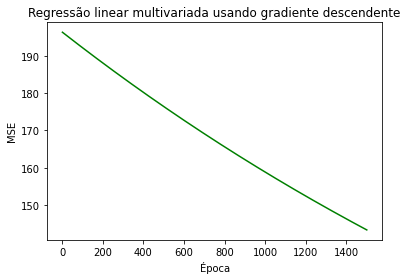

In [ ]:
plt.plot(range(1,f_MLRGD.epoca+1), f_MLRGD.mse_grafic, color='green')

plt.title("Regressão linear multivariada usando gradiente descendente")
plt.xlabel("Época")
plt.ylabel("MSE")
plt.show()

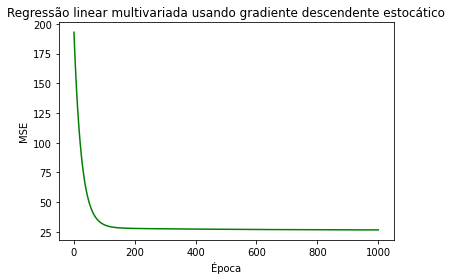

In [ ]:
plt.plot(range(1,f_MLRGDE.epoca+1), f_MLRGDE.mse_grafic, color='green')

plt.title("Regressão linear multivariada usando gradiente descendente estocático")
plt.xlabel("Época")
plt.ylabel("MSE")
plt.show()

O  gradiente descendente estocástico(MLRDE) converge mais rapidamente, precisando usar uma quantidade menor de número de épocas e uma menor taxa de aprendizagem para alcanças valores de erro menores que o gradiente descendente.

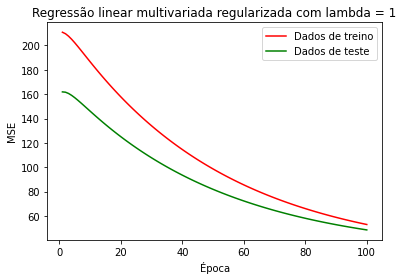

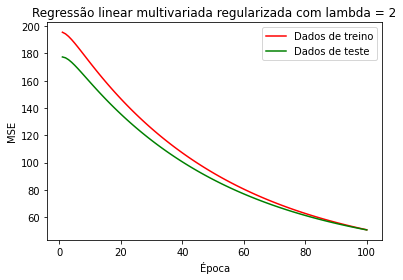

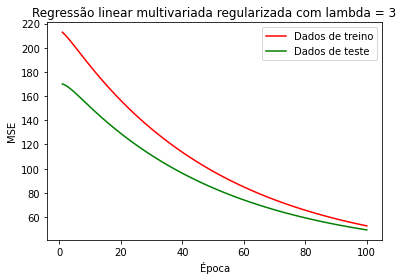

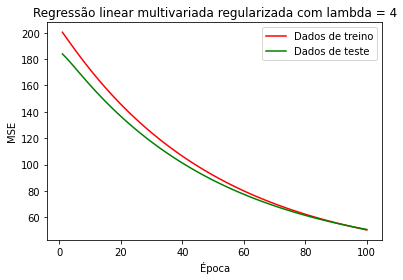

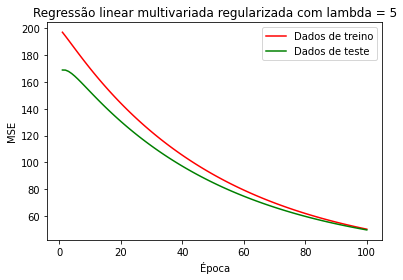

In [ ]:
mse = np.array([])
lambida = 6

for l in range(1, lambida):
    f_RLMGD = RLMGD(learning_rate=0.01, epoca=100, lambida = 1)
    f_RLMGD.fit(x_train, y_train)
    
    plt.plot(range(1,f_RLMGD.epoca+1), f_RLMGD.mse_grafic, color='red', label='Dados de treino')
    
    f_RLMGD = RLMGD(learning_rate=0.01, epoca=100, lambida = 1)
    f_RLMGD.fit(x_teste, y_teste)
    
    plt.plot(range(1,f_RLMGD.epoca+1), f_RLMGD.mse_grafic, color='green', label='Dados de teste')
    
    plt.title("Regressão linear multivariada regularizada com lambda = {}".format(l))
    plt.xlabel("Época")
    plt.ylabel("MSE")
    plt.legend()
    plt.show()


O mais statifatível é quando o valor de "lambida" é igual a 3, pois os valores de erro para os treinos e para testes se aproximam bastantes, tornando-se o melhor modelo.